In [44]:
import pandas as pd
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
pd.set_option("display.max_rows", 50)

In [46]:
df = pd.read_csv("nba_games.csv", index_col=0)

In [47]:
abbreviations = ['fga', 'fg%', '3pa', '3p%', 'fta', 'ft%', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', '+/-_max', 'team', 'total', 'home','season','date','won',
                 'fga_opp', 'fg%_opp', '3pa_opp', '3p%_opp', 'fta_opp', 'ft%_opp', 'ast_opp', 'stl_opp', 'blk_opp', 'tov_opp', 'pf_opp', 'pts_opp', '+/-_max_opp', 'team_opp', 'total_opp', 'home_opp']

# Lọc DataFrame chỉ chứa các thuộc tính theo tên viết tắt
df_filtered = df.loc[:, abbreviations]

# In thông tin tổng quan về DataFrame đã lọc
print(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5190 entries, 0 to 5189
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fga          5190 non-null   int64  
 1   fg%          5190 non-null   float64
 2   3pa          5190 non-null   int64  
 3   3p%          5190 non-null   float64
 4   fta          5190 non-null   int64  
 5   ft%          5190 non-null   float64
 6   ast          5190 non-null   int64  
 7   stl          5190 non-null   int64  
 8   blk          5190 non-null   int64  
 9   tov          5190 non-null   int64  
 10  pf           5190 non-null   int64  
 11  pts          5190 non-null   int64  
 12  +/-_max      5190 non-null   int64  
 13  team         5190 non-null   object 
 14  total        5190 non-null   int64  
 15  home         5190 non-null   int64  
 16  season       5190 non-null   int64  
 17  date         5190 non-null   object 
 18  won          5190 non-null   bool   
 19  fga_op

In [48]:
# hiển thị số hàng và cột của dữ liệu
print("Shape:", df.shape)

# hiển thị thông tin về các cột trong dữ liệu
print("Description:")
print(df.describe())
df.head()

Shape: (5190, 141)
Description:
                mp           fg          fga          fg%           3p  \
count  5190.000000  5190.000000  5190.000000  5190.000000  5190.000000   
mean    241.358382    40.836031    88.094027     0.464371    12.536224   
std       6.386918     5.263521     6.895471     0.054962     3.895451   
min     240.000000    23.000000    66.000000     0.277000     2.000000   
25%     240.000000    37.000000    83.000000     0.425000    10.000000   
50%     240.000000    41.000000    88.000000     0.463000    12.000000   
75%     240.000000    44.000000    92.000000     0.500000    15.000000   
max     315.000000    63.000000   120.000000     0.687000    29.000000   

               3pa          3p%           ft          fta          ft%  ...  \
count  5190.000000  5190.000000  5190.000000  5190.000000  5190.000000  ...   
mean     34.873796     0.358630    17.004624    21.898844     0.777592  ...   
std       6.810916     0.084426     5.755638     6.977345     0.

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,240,37,99,0.374,10,33,0.303,15,23,0.652,...,43.6,40.4,300,98,BRK,125,1,2021,12/22/2020,False
1,240,42,92,0.457,15,35,0.429,26,32,0.813,...,50.0,32.1,267,120,GSW,99,0,2021,12/22/2020,True
2,240,44,93,0.473,14,40,0.350,14,19,0.737,...,100.0,35.9,166,118,LAL,109,1,2021,12/22/2020,True
3,240,38,81,0.469,9,29,0.310,24,31,0.774,...,20.9,40.2,154,114,LAC,116,0,2021,12/22/2020,False
4,240,46,90,0.511,14,35,0.400,15,18,0.833,...,33.3,39.2,203,126,BOS,122,1,2021,12/23/2020,False


In [49]:
df.isnull().sum()

mp           0
fg           0
fga          0
fg%          0
3p           0
            ..
total_opp    0
home_opp     0
season       0
date         0
won          0
Length: 141, dtype: int64

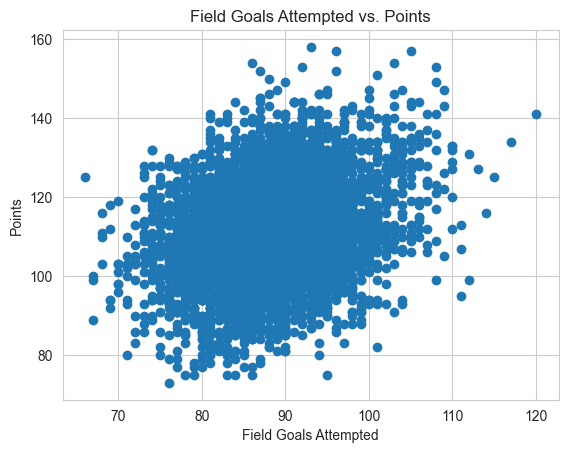

In [ ]:
# Vẽ biểu đồ scatter
plt.scatter(df['fga'], df['pts'])
plt.title('Field Goals Attempted vs. Points')
plt.xlabel('Field Goals Attempted')
plt.ylabel('Points')
plt.show()

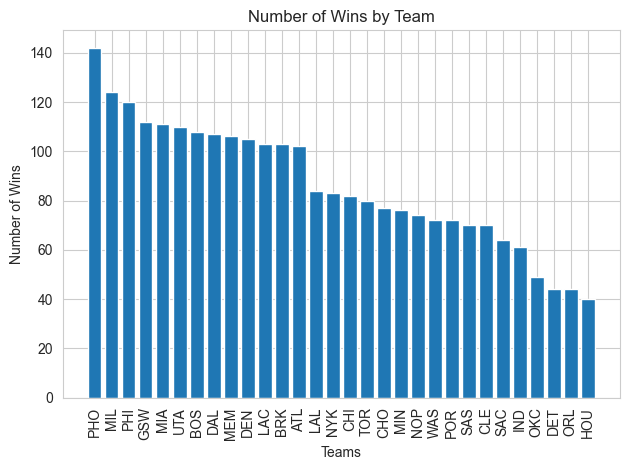

In [ ]:


# Tính số trận thắng của mỗi đội
team_wins = df[df['won'] == 1]['team'].value_counts()

# Sắp xếp giảm dần theo số trận thắng
team_wins = team_wins.sort_values(ascending=False)

# Tạo biểu đồ bar chart
plt.bar(team_wins.index, team_wins.values)
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by Team')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


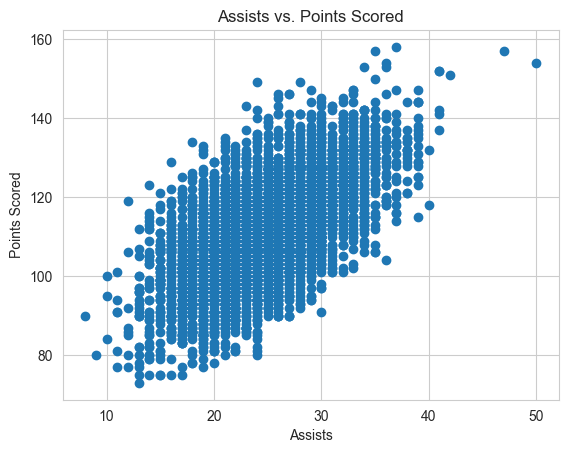

In [ ]:


# Lấy các thuộc tính quan tâm
data = df[['ast', 'pts']]

# Tạo biểu đồ scatter plot
plt.scatter(data['ast'], data['pts'])
plt.xlabel('Assists')
plt.ylabel('Points Scored')
plt.title('Assists vs. Points Scored')
plt.show()


Mỗi điểm trên biểu đồ đại diện cho một trận đấu, và vị trí của điểm thể hiện mức độ tương quan giữa khả năng chia sẻ bóng và tạo cơ hội ghi điểm

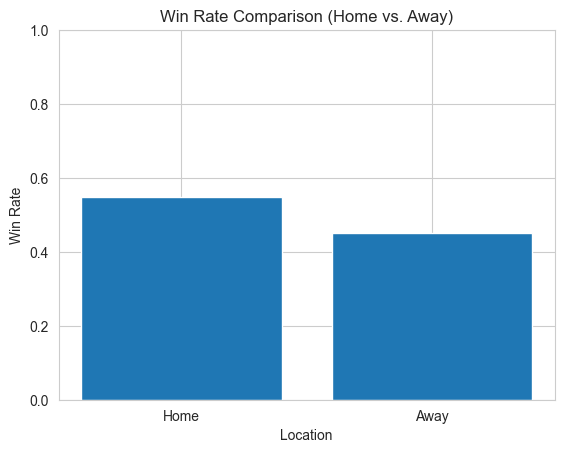

In [54]:


# Tính tỷ lệ chiến thắng khi đội nhà và khi đội không nhà
home_win_rate = df[df['home'] == 1]['won'].mean()
away_win_rate = df[df['home'] == 0]['won'].mean()

# Tạo biểu đồ bar chart
labels = ['Home', 'Away']
win_rates = [home_win_rate, away_win_rate]

plt.bar(labels, win_rates)
plt.xlabel('Location')
plt.ylabel('Win Rate')
plt.title('Win Rate Comparison (Home vs. Away)')
plt.ylim(0, 1)  # Đảm bảo giới hạn trục y từ 0 đến 1
plt.show()


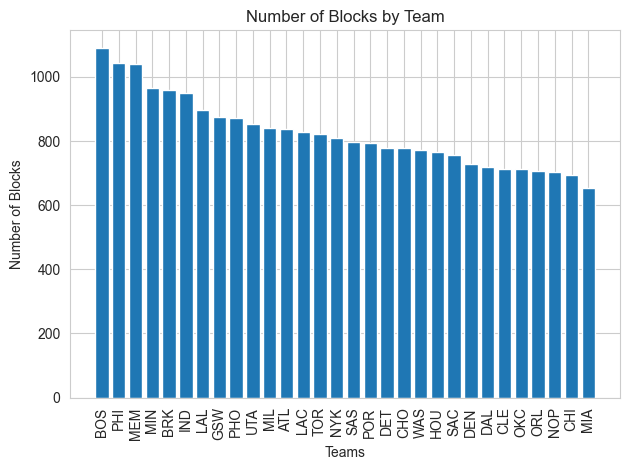

In [55]:


# Tính tổng số lần chặn đòn của mỗi đội
team_blocks = df.groupby('team')['blk'].sum()

# Sắp xếp giảm dần theo số lần chặn đòn
team_blocks = team_blocks.sort_values(ascending=False)

# Tạo biểu đồ bar chart
plt.bar(team_blocks.index, team_blocks.values)
plt.xlabel('Teams')
plt.ylabel('Number of Blocks')
plt.title('Number of Blocks by Team')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


Phân tích số lần chặn đòn (blk) để đo lường khả năng phòng ngự của đội bóng 

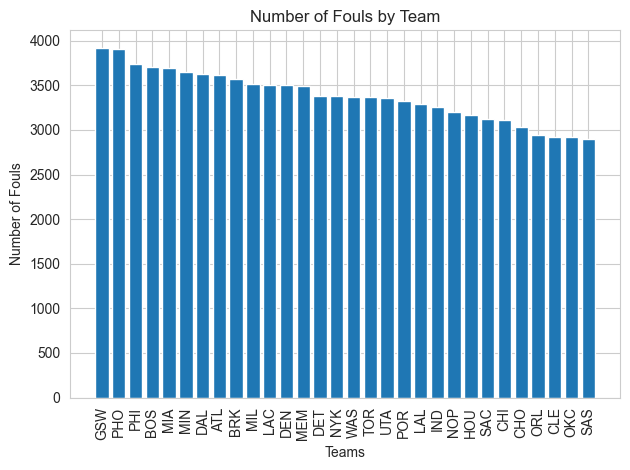

In [56]:


# Tính tổng số lần vi phạm của mỗi đội
team_fouls = df.groupby('team')['pf'].sum()

# Sắp xếp giảm dần theo số lần vi phạm
team_fouls = team_fouls.sort_values(ascending=False)

# Tạo biểu đồ bar chart
plt.bar(team_fouls.index, team_fouls.values)
plt.xlabel('Teams')
plt.ylabel('Number of Fouls')
plt.title('Number of Fouls by Team')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


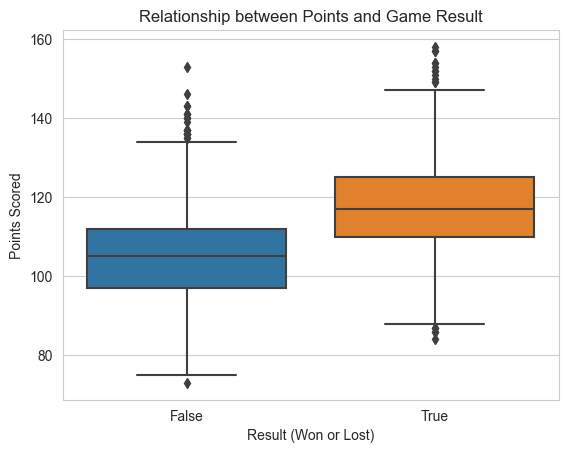

In [57]:


# Tạo biểu đồ Boxplot hoặc Violinplot
sns.boxplot(x='won', y='pts', data=df)
plt.xlabel('Result (Won or Lost)')
plt.ylabel('Points Scored')
plt.title('Relationship between Points and Game Result')
plt.show()


Trận đấu có khả năng thắng cao hơn khi có số lần ghi điểm trung vị cao, phân phối ghi điểm tập trung cao hơn và ít giá trị ngoại lai trong số lần ghi điểm

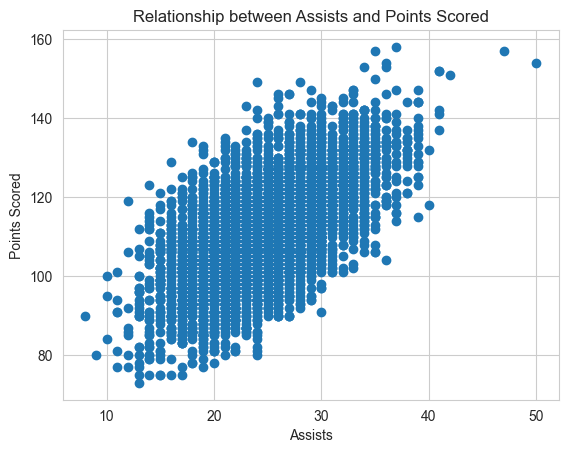

In [58]:


# Tạo biểu đồ Scatterplot
plt.scatter(df['ast'], df['pts'])
plt.xlabel('Assists')
plt.ylabel('Points Scored')
plt.title('Relationship between Assists and Points Scored')
plt.show()


Theo kết quả ở trên ta thấy có sự tương quan giữa số lần ghi điểm (pts) và số lần kiến tạo (ast) 

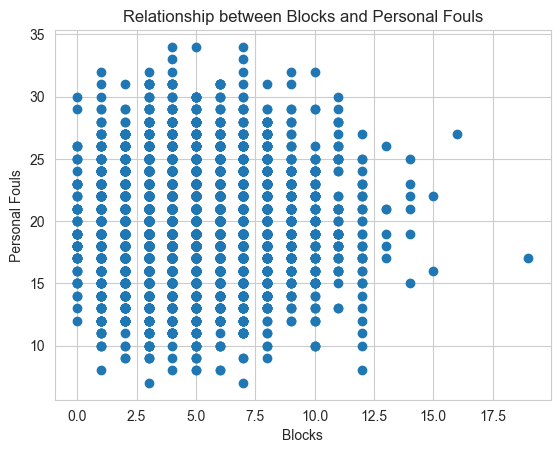

In [59]:


# Tạo biểu đồ Scatterplot
plt.scatter(df['blk'], df['pf'])
plt.xlabel('Blocks')
plt.ylabel('Personal Fouls')
plt.title('Relationship between Blocks and Personal Fouls')
plt.show()


Qua quan sát trên biểu đồ ta thấy rằng không có mối tương quan giữa hai thuộc tính này 

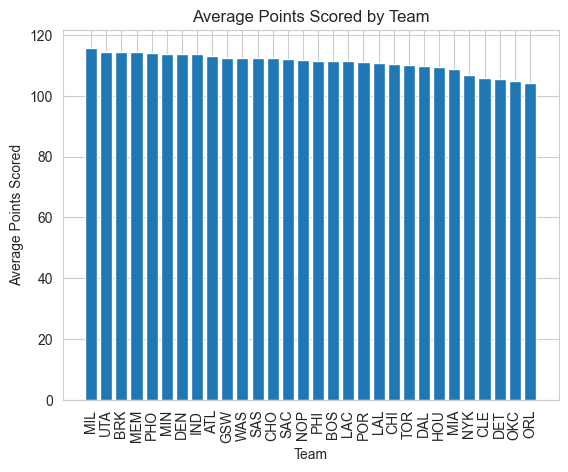

In [60]:

# Tính số lần ghi điểm trung bình theo đội
average_pts = df.groupby('team')['pts'].mean().sort_values(ascending=False)

# Vẽ biểu đồ cột
plt.bar(average_pts.index, average_pts)
plt.xlabel('Team')
plt.ylabel('Average Points Scored')
plt.title('Average Points Scored by Team')
plt.xticks(rotation=90)
plt.show()


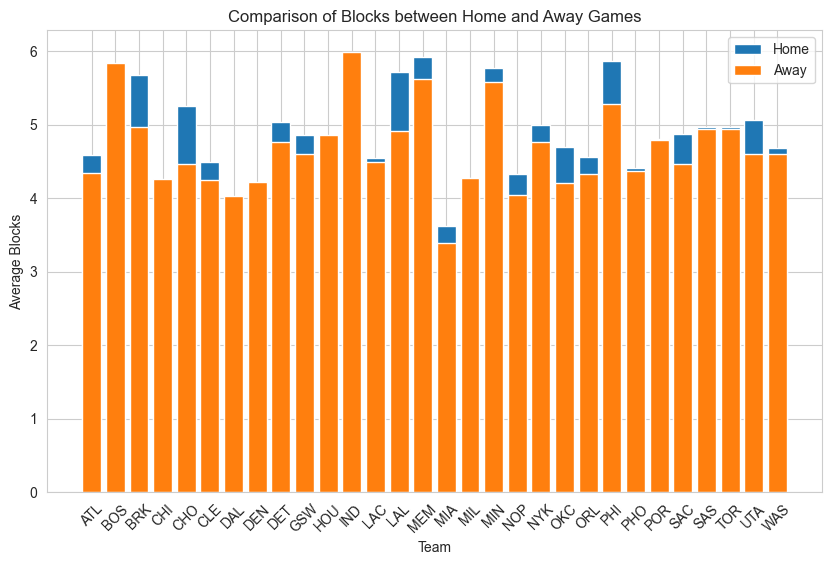

In [62]:


# Tạo DataFrame mới chỉ chứa thông tin khi ở sân nhà
home_data = df[df['home'] == 1]

# Tính trung bình số lần chặn đòn (blk) khi ở sân nhà cho mỗi đội
home_blk_mean = home_data.groupby('team')['blk'].mean()

# Tạo DataFrame mới chỉ chứa thông tin khi không ở sân nhà
away_data = df[df['home'] == 0]

# Tính trung bình số lần chặn đòn (blk) khi không ở sân nhà cho mỗi đội
away_blk_mean = away_data.groupby('team')['blk'].mean()

# Tạo danh sách tên đội
teams = home_blk_mean.index

# Tạo biểu đồ so sánh mức độ phòng ngự (blk) giữa các đội khi ở sân nhà và khi không ở sân nhà
plt.figure(figsize=(10, 6))
plt.bar(teams, home_blk_mean, label='Home')
plt.bar(teams, away_blk_mean, label='Away')
plt.xlabel('Team')
plt.ylabel('Average Blocks')
plt.title('Comparison of Blocks between Home and Away Games')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Theo quan sát, ta thấy Có sự khác biệt về mức độ phòng ngự (blk) giữa các đội khi ở sân nhà và khi không ở sân nhà. Khi không ở sân nhà các đội phòng ngự nhiều hơn. Vì khi không ở sân nhà, các đội có thể đặt nhiều tập trung hơn vào việc phòng ngự để ngăn chặn đối thủ ghi điểm. Điều này có thể do sự thận trọng hơn trong việc bảo vệ khu vực phòng ngự và tránh mắc lỗi 